### Linear Model Selection and Regularization

This programming assignment will use the `Tidy Models` platform. It will take a look at regularization models and hyperparameter tuning. These models contain a regularization term. This assignment will use [parsnip](https://www.tidymodels.org/start/models/) for model fitting and [recipes and workflows](https://www.tidymodels.org/start/recipes/) to perform the transformations, and [tune and dials](https://www.tidymodels.org/start/tuning/) to tune the hyperparameters of the model.

You will be using the `Hitters` data set from the `ISLR` package. You wish to predict the baseball players `Salary` based on several different characteristics which are included in the data set. 

Since you wish to predict `Salary`, then you need to remove any missing data from that column. Otherwise, you won't be able to run the models.

**Set output as** `Hitters` 

In [ ]:
library(tidymodels)
library(ISLR2)

# Your code here
# Hitters <- 

# your code here


In [ ]:
# Hidden Tests

You will use the `glmnet` package to perform **ridge regression**. `parsnip` does not have a dedicated function to create a ridge regression model specification. You need to use `linear_reg()` and set `mixture = 0` to specify a ridge model. The `mixture` argument specifies the amount of different types of regularization, `mixture = 0` specifies only **ridge regularization** and `mixture = 1` specifies only **lasso regularization**. 

Setting `mixture` to a value between 0 and 1 lets us use both. When using the `glmnet` engine you also need to set a `penalty` to be able to fit the model. You will set this value to `0` for now, it is not the best value, but you will look at how to select the best value in a little bit.

In [ ]:
ridge_spec <- linear_reg(mixture = 0, penalty = 0) %>%
  set_mode("regression") %>%
  set_engine("glmnet")

Once the specification is created you can fit it to you data. You will use all the predictors. Use the `fit` function here. 

In [ ]:
ridge_fit <- fit(ridge_spec, Salary ~ ., data = Hitters)

The `glmnet` package will fit the model for all values of `penalty` at once, so you can now see see what the parameter estimate for the model is now that you have `penalty = 0`. You can use the `tidy` function to accomplish this specific  task. 

In [ ]:
tidy(ridge_fit)

Let us instead see what the estimates would be if the penalty was `11498`. Store your output to `tidy2`. What do you notice?  

In [ ]:
# Your code here 

# tidy2 <- 


# your code here


In [ ]:
# Hidden Tests

Look below at the parameter estimates for `penalty = 705`. Store your output to `tidy3`. Once again, use the `tidy` function to accomplish this task. 

In [ ]:
# Your code here 

# tidy3 <- 


# your code here


In [ ]:
# Hidden Tests

You can visualize how the magnitude of the coefficients are being regularized towards zero as the penalty goes up. Use the `autoplot()` function to accomplish this task. **Output variable here is** `ridge_fit`. Your image should look like this: 

<div>
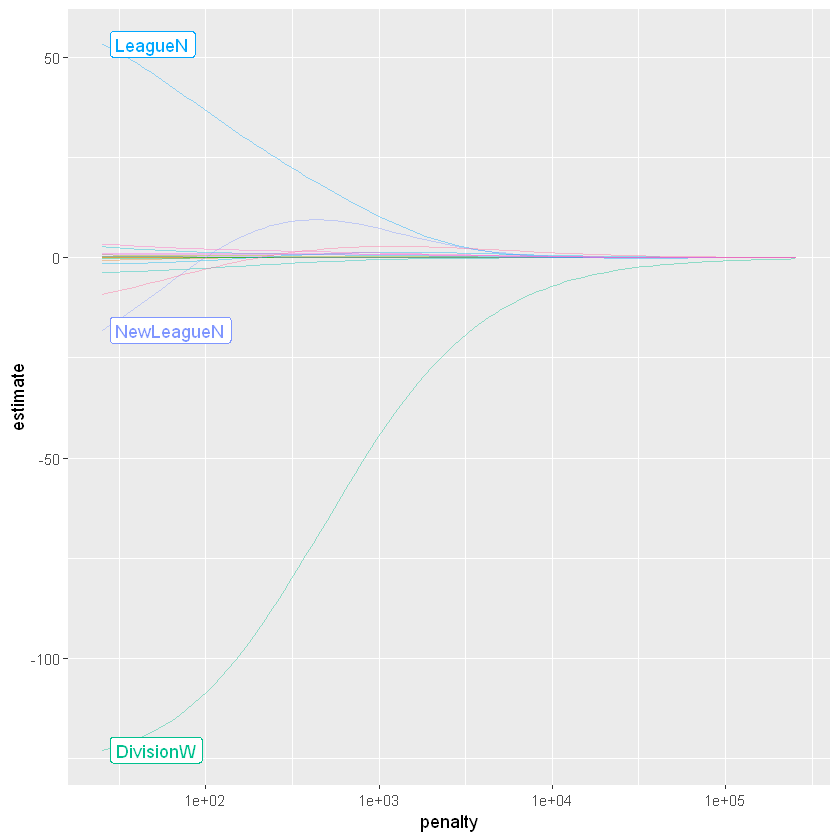
</div>


In [ ]:
ridge_fit <- %>% autoplot()

Prediction is done like normal, if you use `predict()` by itself, then `penalty = 0` as you set in the model specification is used.

In [ ]:
predict(ridge_fit, new_data = Hitters)

But you can also get predictions for other values of `penalty` by specifying it in `predict()`. Test with a value of `500`. Store your output to `predict_500`


In [ ]:
# Your code here 

# predict_500 <- 

# your code here


In [ ]:
# Hidden Tests

You saw how we can fit a ridge model and make predictions for different values of `penalty`. But it would be great if you could find the "best" value of the penalty. This is something you can use **hyperparameter** tuning for. Hyperparameter tuning is in its simplest form a way of fitting many models with different sets of hyperparameters trying to find one that performs "best".

The complexity in hyperparameter tuning can come from how you try different models. You will keep it simple for this lab and only look at grid search, only looking at evenly spaced parameter values. This is a fine enough approach if you have one or two tunable parameters but can become computationally infeasible. 

See the chapter on [iterative search](https://www.tmwr.org/iterative-search.html) from [Tidy Modeling with R](https://www.tmwr.org/) for more information.

You begin like normal by setting up a validation split (testing and training set). A **K-fold cross-validation data set** is created on the training data set with 10 folds.

In [ ]:
Hitters_split <- initial_split(Hitters, strata = "Salary")
Hitters_train <- training(Hitters_split)
Hitters_test <- testing(Hitters_split)
Hitters_fold <- vfold_cv(Hitters_train, v = 10)

You can use the `tune_grid()` function to perform hyperparameter tuning using a grid search. `tune_grid()` needs 3 different things;

-   a `workflow` object containing the model and preprocessor,
-   a `rset` object containing the resamples the `workflow` should be fitted within, and
-   a `tibble` containing the parameter values to be evaluated.

Optionally a metric set of performance metrics can be supplied for evaluation. If you don't set one then a default set of performance metrics is used.

You already have a resample object created in `Hitters_fold`. Now you should create the workflow specification next.

You just used the data set as is when you fit the model earlier. However, **ridge regression** is scale sensitive so you need to make sure that the variables are on the same scale. You can use `step_normalize()`. Secondly you can deal with the factor variables yourself using `step_novel()` and `step_dummy()`. 

In [ ]:
ridge_recipe <- 
  recipe(formula = Salary ~ ., data = Hitters_train) %>% 
  step_novel(all_nominal_predictors()) %>% 
  step_dummy(all_nominal_predictors()) %>% 
  step_zv(all_predictors()) %>% 
  step_normalize(all_predictors())

The model specification will look very similar to what you have seen earlier, but you will set `penalty = tune()`. This tells `tune_grid()` that the `penalty` parameter should be tuned. The output variable here will once again be `ridge_spec`. The functions used will be `linear_reg`, `set_mode` and `set_engine`.

In [ ]:
# Your code here 
# ridge_spec <- 

# your code here


In [ ]:
# Hidden Tests

Now you combine to create a `workflow` object. Your output variable here will be `ridge_worfklow` and the three functions you will use will be `workflow`,`add_recipe` and `add_model`. Your recipe will be `ridge_recipe` and your model will be `ridge_spec`.


In [ ]:
# Your code here 
# ridge_workflow <- 

# your code here


In [ ]:
# Hidden Tests


The last thing you need is the values of `penalty` you are trying. This can be created using `grid_regular()` which creates a grid of evenly spaces parameter values. You use the `penalty()` function from the [dials](https://dials.tidymodels.org/) package to denote the parameter and set the range of the grid you are searching for. Note that this range is log-scaled. Your output variable here is going to be `penalty_grid`. For `penalty` use a range from -5 to 5, and 50 values (levels).  

In [ ]:
# Your code here 
# penalty_grid <- 

# your code here


In [ ]:
expect_equal(penalty_grid$penalty[1], 1e-05)
expect_equal(penalty_grid$penalty[25], 0.79060432109077, tolerance=1e-5)
expect_equal(penalty_grid$penalty[50], 1e+05)

# Hidden Tests

Using 50 levels for one parameter might seem overkill and in many applications it is. But remember that `glmnet` fits all the models in one go so adding more levels to `penalty` doesn't affect the computational speed much.

Now you have everything you need and you can fit all the models. Your output variable here is going to be `tune_res` and you will be using the `tune_grid` function. 


In [ ]:
tune_res <- tune_grid(
  ridge_workflow,
  resamples = Hitters_fold, 
  grid = penalty_grid
)

The output of `tune_grid()` can be hard to read by itself unprocessed. `autoplot()` creates a great visualization. Go on ahead and use this function for visualization. What do you notice in your plot? 

In [ ]:
autoplot(tune_res)

You can also see the raw metrics that created this chart by calling `collect_matrics()`.


In [ ]:
collect_metrics(tune_res)

The "best" values of this can be selected using `select_best()`, this function requires you to specify a `metric` that it should select against; use "rsq" for your metric. Your output variable here will be `best_penalty`. 


In [ ]:
# Your code here 
# best_penalty <- 

# your code here


In [ ]:
# Hidden Tests

This value of `penalty` can then be used with `finalize_workflow()` to update/finalize the recipe by replacing `tune()` with the value of `best_penalty`. Now, this model should be fit again, this time using the whole training data set.

In [ ]:
ridge_final <- finalize_workflow(ridge_workflow, best_penalty)
ridge_final_fit <- fit(ridge_final, data = Hitters_train)

This final model can now be applied on your testing data set to validate the performance. Go ahead and perfrom this task. You will use both the`augment` and the `rsq` function. What do you notice? 


In [ ]:
augment(ridge_final_fit, new_data = Hitters_test) %>%
  rsq(truth = Salary, estimate = .pred)